In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
weatherdf = pd.read_csv('data/weather.csv')
weatherdf.head()

,day,chicago,chennai,berlin
0,Monday,32,75,41
1,Tuesday,30,77,43
2,Wednesday,28,75,45
3,Thursday,22,82,38
4,Friday,30,83,30


In [68]:
#use the pivot function
weatherdf.pivot_table(columns="day")

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
berlin,30,41,45,47,38,43,45
chennai,83,75,81,77,82,77,75
chicago,30,32,20,25,22,30,28


In [69]:
#use the melt function
weatherdf.melt(id_vars="day",var_name="city",value_name="temperature")
#stack and unstack function

,day,city,temperature
0,Monday,chicago,32
1,Tuesday,chicago,30
2,Wednesday,chicago,28
3,Thursday,chicago,22
4,Friday,chicago,30
5,Saturday,chicago,20
6,Sunday,chicago,25
7,Monday,chennai,75
8,Tuesday,chennai,77
9,Wednesday,chennai,75


In [70]:
# Time series analysis in Python.
aapl = pd.read_csv('data/AAPL-Historical.csv',parse_dates=["Date"], index_col="Date")
aapl.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-10,175.210007,179.630005,174.690002,179.449997,178.414536,115402700
2021-12-13,181.119995,182.130005,175.529999,175.740005,174.725937,153237000
2021-12-14,175.250000,177.740005,172.210007,174.330002,173.324081,139380400
2021-12-15,175.110001,179.500000,172.309998,179.300003,178.265396,131063300
2021-12-16,179.279999,181.139999,170.750000,172.259995,171.266006,150185800


In [71]:

type(aapl.index)
print("\n",aapl["2021-12"].Close.mean())
print("\n",aapl["2021-12-10":"2021-12-14"])
print("\n",aapl.Close.resample("M").mean())


 176.11000053333333

                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-12-10  175.210007  179.630005  174.690002  179.449997  178.414536   
2021-12-13  181.119995  182.130005  175.529999  175.740005  174.725937   
2021-12-14  175.250000  177.740005  172.210007  174.330002  173.324081   

               Volume  
Date                   
2021-12-10  115402700  
2021-12-13  153237000  
2021-12-14  139380400  

 Date
2021-12-31    176.110001
2022-01-31    169.861500
2022-02-28    169.830001
2022-03-31    165.310435
2022-04-30    166.820999
2022-05-31    148.430477
2022-06-30    139.798573
2022-07-31    149.670499
2022-08-31    166.885218
2022-09-30    153.002856
2022-10-31    145.013333
2022-11-30    145.843331
2022-12-31    144.487144
Freq: M, Name: Close, dtype: float64


/var/folders/k8/gg_m5nbs2056hm824n8k0d3m0000gq/T/ipykernel_61430/3847787497.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print("\n",aapl["2021-12"].Close.mean())


<AxesSubplot:xlabel='Date'>

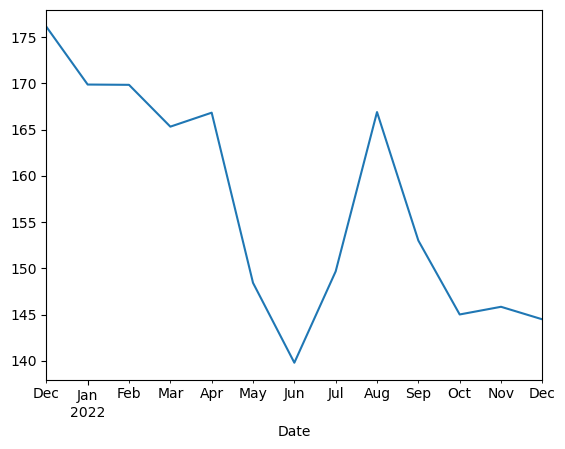

In [72]:
%matplotlib inline
aapl.Close.resample("M").mean().plot()

In [73]:
#Pandas date range fucntion if you are missing a date column
drange = pd.date_range(start="2021-01-01", end="2021-01-31", freq="B")
print(drange)
drange1 = pd.date_range(start="2021-01-01",periods=10, freq="B")
print(drange1)

#Generate some random data for the date range
ser =  pd.Series(np.random.randint(1,10,len(drange1)),index=drange1)
print(ser)

print(pd.to_datetime(["2021-01-01","2021-01-07"]))


DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14', '2021-01-15', '2021-01-18',
               '2021-01-19', '2021-01-20', '2021-01-21', '2021-01-22',
               '2021-01-25', '2021-01-26', '2021-01-27', '2021-01-28',
               '2021-01-29'],
              dtype='datetime64[ns]', freq='B')
DatetimeIndex(['2021-01-01', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-14'],
              dtype='datetime64[ns]', freq='B')
2021-01-01    7
2021-01-04    9
2021-01-05    3
2021-01-06    7
2021-01-07    9
2021-01-08    4
2021-01-11    2
2021-01-12    1
2021-01-13    8
2021-01-14    4
Freq: B, dtype: int64
DatetimeIndex(['2021-01-01', '2021-01-07'], dtype='datetime64[ns]', freq=None)


In [74]:
#period and period Index for time series analysis.
yp = pd.Period("2016")
print(yp, yp+1,yp-1, "---", yp.start_time, "---",  yp.end_time)

yp = pd.Period("2016-01","M")
print(yp, yp+1,yp-1, "---", yp.start_time, "---",  yp.end_time)
#update period using asfreq


2016 2017 2015 --- 2016-01-01 00:00:00 --- 2016-12-31 23:59:59.999999999
2016-01 2016-02 2015-12 --- 2016-01-01 00:00:00 --- 2016-01-31 23:59:59.999999999


In [75]:
#Use period index to set an index of periods
wmt = pd.read_csv('data/wmt.csv')
wmt.head()

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [76]:
wmt.set_index("Line Item", inplace = True)
wmt.head()

,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
Line Item,,,,,
Revenue,115904,120854,118179,130936,117542
Expenses,86544,89485,87484,97743,87688
Profit,29360,31369,30695,33193,29854


In [77]:
wmt = wmt.T
wmt.head()


Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [78]:
wmt.index = pd.PeriodIndex(wmt.index, freq = "Q-JAN")
print(wmt.index)
wmt['start_date'] = wmt.index.map(lambda x: x.start_time)
wmt['end_date'] = wmt.index.map(lambda y: y.end_time)
wmt.head()

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]')


Line Item,Revenue,Expenses,Profit,start_date,end_date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30 23:59:59.999999999
2017Q2,120854,89485,31369,2016-05-01,2016-07-31 23:59:59.999999999
2017Q3,118179,87484,30695,2016-08-01,2016-10-31 23:59:59.999999999
2017Q4,130936,97743,33193,2016-11-01,2017-01-31 23:59:59.999999999
2018Q1,117542,87688,29854,2017-02-01,2017-04-30 23:59:59.999999999


In [79]:
#shifting values up or down
wmt['Profit'].shift(-1)

2017Q1    31369.0
2017Q2    30695.0
2017Q3    33193.0
2017Q4    29854.0
2018Q1        NaN
Freq: Q-JAN, Name: Profit, dtype: float64